# Regressão Linear - Sem variáveis obtidas após o abate

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('../../dados/dadosTransformados_v1.csv', sep=';')

In [38]:
df.shape

(960939, 53)

In [4]:
pd.set_option('display.max_columns',999)
pd.set_option("display.max_rows", 999)

In [8]:
df.sample(5)

,tipificacao_1,tipificacao_2,tipificacao_3,maturidade,acabamento,peso,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,ilp,ilpf,ifp,fabrica_racao,identificacao_individual,regua_de_manejo,bpa,participa_aliancas_mercadologicas,rastreamento_sisbov,tot1m_chuva,med1m_formituinst,med1m_ndvi,med1m_prer_soja,med1m_prer_milho,med1m_prer_boi,tot3m_chuva,med3m_formituinst,med3m_ndvi,med3m_prer_soja,med3m_prer_milho,med3m_prer_boi,tot6m_chuva,med6m_formituinst,med6m_ndvi,med6m_prer_soja,med6m_prer_milho,med6m_prer_boi,tot12m_chuva,med12m_formituinst,med12m_ndvi,med12m_prer_soja,med12m_prer_milho,med12m_prer_boi,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,ano,categoria,classificacao,longitude,latitude,mes
49677,1,0,0,4,2,282.0,21.0,0,0,0,0,0,0,0,1,1,0,0,1,4.71,69.45,0.51,70.87,26.59,126.12,197.67,72.58,0.58,69.26,27.33,131.97,444.85,73.81,0.62,70.47,30.67,137.64,301.29,74.00,0.61,70.81,31.07,138.53,0.7097,0.5161,0.3497,0.3485,2017,6,0,-54.758056,-18.508411,7
604874,0,0,1,1,3,248.5,30.0,0,1,1,0,0,0,1,1,1,0,1,1,12.58,69.94,0.38,88.39,38.52,143.01,113.96,69.07,0.45,86.62,40.12,140.55,520.54,70.53,0.52,84.10,39.82,142.27,1619.47,71.73,0.52,78.09,35.41,142.37,0.8710,0.8710,0.7869,0.6776,2018,1,1,-54.440680,-20.103740,8
387436,0,0,1,6,3,212.0,26.0,0,1,0,1,0,0,0,0,1,0,1,0,158.52,73.51,0.66,78.36,39.57,145.49,543.69,73.79,0.65,74.48,35.26,145.85,927.34,73.82,0.61,73.60,33.26,143.76,1794.58,72.44,0.58,71.40,30.39,138.69,0.5161,0.4194,0.4354,0.5418,2018,6,0,-53.351570,-22.248760,3
526383,1,0,0,1,3,289.4,21.0,0,0,0,0,0,0,1,0,1,0,0,0,9.10,70.55,0.38,84.93,41.14,138.76,107.43,71.37,0.50,85.32,41.10,140.86,467.23,73.37,0.57,80.36,38.69,143.15,1128.69,72.81,0.51,76.08,33.98,140.33,0.7742,0.7097,0.4645,0.5069,2018,1,1,-51.188708,-19.677372,6
114132,1,0,0,4,2,289.2,21.0,0,0,0,0,0,0,1,1,0,0,0,1,0.00,74.97,0.42,69.64,27.50,140.28,310.22,72.29,0.46,70.48,26.72,130.74,686.44,73.25,0.56,69.22,27.78,133.81,1586.43,73.51,0.58,70.71,30.08,137.34,0.3000,0.5600,0.4851,0.4271,2017,6,0,-52.036300,-21.247120,9


In [41]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
tipificacao_1,960939.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
tipificacao_2,960939.0,0.22,0.42,0.00,0.00,0.00,0.00,1.00
tipificacao_3,960939.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00
maturidade,960939.0,2.34,1.59,1.00,1.00,2.00,4.00,8.00
acabamento,960939.0,2.65,0.60,1.00,2.00,3.00,3.00,5.00
peso,960939.0,267.49,44.37,159.60,237.00,271.80,298.60,376.00
classificacao_estabelecimento,960939.0,24.47,3.62,21.00,21.00,26.00,26.00,30.00
outros_incentivos,960939.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
pratica_recuperacao_pastagem,960939.0,0.59,0.49,0.00,0.00,1.00,1.00,1.00
fertiirrigacao,960939.0,0.09,0.29,0.00,0.00,0.00,0.00,1.00


## Criando conjunto de treino e de teste

In [42]:
y = df['peso']
# Retirar a variável alvo e as variáveis obtidas após o abate 
X = df.drop(['peso','acabamento', 'maturidade', 'categoria'],axis=1)

In [43]:
SEED = 32

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [45]:
X_train.shape

(672657, 49)

## Instaciando a classe LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

## Obter o coeficiente de determinação (𝑅²)

In [48]:
print('R² = {}'.format(model.score(X_train, y_train).round(3)))

R² = 0.553


## Previsões dados de treino

In [49]:
y_predicted_train = model.predict(X_train)
y_predicted = model.predict(X_test)

## Avaliando o modelo

In [50]:
print("1) Pontuação de variância explicada, esta métrica avalia a variação ou dispersão dos pontos de dados:", np.round(mt.explained_variance_score(y_test,y_predicted)*100,2),"%")
print("2) Erro Absoluto Médio (Mean Absolute Error) - MAE:", np.round(mt.mean_absolute_error(y_test,y_predicted),2))
print("3) Erro Quadrático Médio (Root Mean Square Error) - RMSE:" , np.round(np.sqrt(mt.mean_squared_error(y_test, y_predicted)),2))

1) Pontuação de variância explicada, esta métrica avalia a variação ou dispersão dos pontos de dados: 55.4 %
2) Erro Absoluto Médio (Mean Absolute Error) - MAE: 23.53
3) Erro Quadrático Médio (Root Mean Square Error) - RMSE: 29.62


# Seleção de recursos 

## Utilização do pacote Statsmodel

In [51]:
#Criando uma coluna com a constante, forma como o OLS utiliza para estimar
X_train_Sm= sm.add_constant(X_train)

In [52]:
model_sm = sm.OLS(y_train, X_train_Sm, hasconst = True).fit()

In [53]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:53:40   Log-Likelihood:            -3.2346e+06
No. Observations:              672657   AIC:                         6.469e+06
Df Residuals:                  672608   BIC:                         6.470e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Avaliando as estatística de teste do novo modelo

    Para o R-squared (R²) foi alcançado o valor de 59% 

### Teste de significância conjunta dos parâmetros
    O teste F a significância conjunta dos parâmetros
    Se Prob(F-statistc) > 0,05 (rejeitamos o modelo, ou seja, ele não é estatisticamente significativo)
    
### Teste de sginificância indiidual dos prâmetros
     O teste T testa a significância individual dos parâmetros
     Se P > |t| > 0,05 (rejeitamos o modelo, ou seja, ele não é estatisticamente significativo)
    


### Nota-se, portanto, que o parâmetro abaixo não passam no testes: 
    tipificacao_1,tipificacao_2, tipificacao_3, tot1m_chuva, tot3m_chuva, med6m_prer_soja, cnt6m_cl_ituinst, cnt12m_cl_ituinst, ano e mes 

## RFE (Recursive Feature Elimination):

In [71]:
y = df['peso']
# Retirar a variável alvo e as variáveis obtidas após o abate 
X = df.drop(['peso','acabamento', 'maturidade', 'categoria'],axis=1)

In [72]:
from sklearn.feature_selection import RFE

#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 12
Score with 12 features: 0.547156


In [73]:
# O número ideal de recursos é 12. 
# Agora informamos o valor 12 como número de recursos para RFE e obtemos o conjunto final de recursos dado pelo método RFE.

In [74]:
cols = list(X.columns)
model = LinearRegression()
#Inicializando o modelo RFE
rfe = RFE(model, 12)             

X_rfe = rfe.fit_transform(X,y)  
#Treinando o modelo
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['tipificacao_1', 'tipificacao_2', 'tipificacao_3', 'ilpf', 'ifp',
       'regua_de_manejo', 'participa_aliancas_mercadologicas',
       'rastreamento_sisbov', 'med3m_ndvi', 'med6m_ndvi', 'med12m_ndvi',
       'cnt12m_cl_ituinst'],
      dtype='object')


In [75]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False False False False False  True  True False False
  True False  True  True False False False False False False False False
  True False False False False False  True False False False False False
  True False False False False False False  True False False False False
 False]
[ 1  1  1 29 15  2  3  4  1  1 16 14  1 17  1  1 34 26  7 37 35 28 38 23
  1 25 24 32 33 30  1 10 12 22 36 19  1  9 11 21  6  8  5  1 27 13 20 18
 31]


In [76]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 tipificacao_1
1 tipificacao_2
1 tipificacao_3
1 ilpf
1 ifp
1 regua_de_manejo
1 participa_aliancas_mercadologicas
1 rastreamento_sisbov
1 med3m_ndvi
1 med6m_ndvi
1 med12m_ndvi
1 cnt12m_cl_ituinst
2 pratica_recuperacao_pastagem
3 fertiirrigacao
4 ilp
5 cnt6m_cl_ituinst
6 cnt1m_cl_ituinst
7 med1m_ndvi
8 cnt3m_cl_ituinst
9 med12m_prer_soja
10 med6m_prer_soja
11 med12m_prer_milho
12 med6m_prer_milho
13 classificacao
14 identificacao_individual
15 outros_incentivos
16 fabrica_racao
17 bpa
18 latitude
19 med12m_formituinst
20 longitude
21 med12m_prer_boi
22 med6m_prer_boi
23 med3m_formituinst
24 med3m_prer_milho
25 med3m_prer_soja
26 med1m_formituinst
27 ano
28 med1m_prer_boi
29 classificacao_estabelecimento
30 med6m_formituinst
31 mes
32 med3m_prer_boi
33 tot6m_chuva
34 tot1m_chuva
35 med1m_prer_milho
36 tot12m_chuva
37 med1m_prer_soja
38 tot3m_chuva


## Lasso Regularization

In [77]:
from sklearn.linear_model import LassoCV

In [78]:
y = df['peso']
# Retirar a variável alvo e as variáveis obtidas após o abate 
X = df.drop(['peso','acabamento', 'maturidade', 'categoria'],axis=1)

In [79]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.532622
Best score using built-in LassoCV: 0.544964


In [80]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 17 variables and eliminated the other 32 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

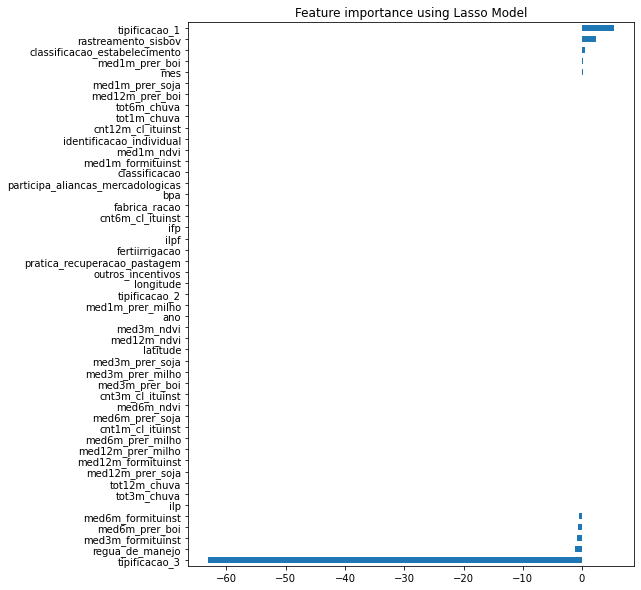

In [81]:
imp_coef = coef.sort_values()
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Validação do Modelo

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [83]:
SEED = 1580
np.random.seed(SEED)
cv = KFold(n_splits = 10, shuffle = True)
lr = LinearRegression()
results = cross_validate(lr, X, y,cv=cv, return_train_score= False)

In [84]:
results

{'fit_time': array([1.59833097, 1.5966146 , 1.52713585, 1.54582191, 1.56290388,
        1.55810308, 1.65209889, 1.56359673, 1.56009221, 1.50412774]),
 'score_time': array([0.0177834 , 0.01784611, 0.0177238 , 0.01810741, 0.01758814,
        0.01850557, 0.01758122, 0.01945615, 0.01743722, 0.01850462]),
 'test_score': array([0.55521689, 0.55170496, 0.54712945, 0.55234563, 0.55488152,
        0.55704786, 0.55588889, 0.55431744, 0.55388782, 0.5529505 ])}

In [85]:
results['test_score']

array([0.55521689, 0.55170496, 0.54712945, 0.55234563, 0.55488152,
       0.55704786, 0.55588889, 0.55431744, 0.55388782, 0.5529505 ])

In [86]:
def imprime_resulado(results) :
    media = results ['test_score'].mean()
    print('Accuracy médio %.2f' % (media*100))
    desvio_padrao = results['test_score'].std()
    print("Accuracy intervalo [ %.2f, %.2f ]" % (media - 2 * desvio_padrao, media + 2 * desvio_padrao))
    

In [87]:
imprime_resulado(results)

Accuracy médio 55.35
Accuracy intervalo [ 0.55, 0.56 ]
